<a href="https://colab.research.google.com/github/JackGallagher41/IDS/blob/main/project4/problem1_python_ipynp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Jack Gallagher**

### **Problem 1 Python**

November 3, 2023

## **1. Use the following dataset about adults: https://github.com/bforoura/IDS/blob/main/HW4/adult_training.csvLinks to an external site.**

In [1]:
import pandas as pd

#used to import the database
adultTrainingDF  = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

#print the dataframe
adultTrainingDF

adultTrainingDF.describe()

,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,1066.581604,88.580793
std,13.678875,2.598297,7255.455373,406.322208
min,17.000000,1.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000


## **2. Create a contingency table of workclass and sex, and plot it.**

In [ ]:
# Cross tabulation of Treatment and Improved

p_crosstab = pd.crosstab(adultTrainingDF.workclass, adultTrainingDF.sex)

print(p_crosstab)

sex               Female  Male
workclass                     
?                    377   452
Federal-gov          149   305
Local-gov            377   592
Never-worked           1     4
Private             3574  6707
Self-emp-inc          54   444
Self-emp-not-inc     178   992
State-gov            201   385
Without-pay            1     4


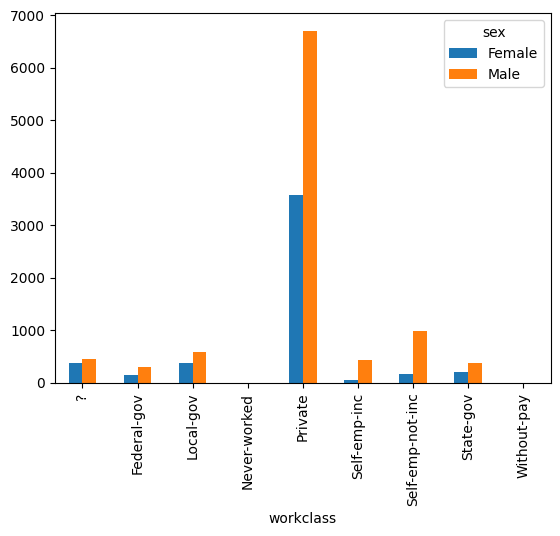

In [ ]:
# Ploting the barplot for contingency table

barplot = p_crosstab.plot.bar(rot=90)

Private Male tends to be the largest grouping while without pay and overworked for both male and female has little representation in the data frame.

## **3. Create a contingency table of sex and marital status, and plot it.**

In [ ]:
#creating contingency table between marital-status and sex
p_crosstabTwo = pd.crosstab(adultTrainingDF['marital-status'], adultTrainingDF['sex'])

print(p_crosstabTwo)

sex                    Female  Male
marital-status                     
Divorced                 1219   795
Married-AF-spouse           7     4
Married-civ-spouse        761  6010
Married-spouse-absent      95   104
Never-married            2160  2717
Separated                 290   182
Widowed                   380    73


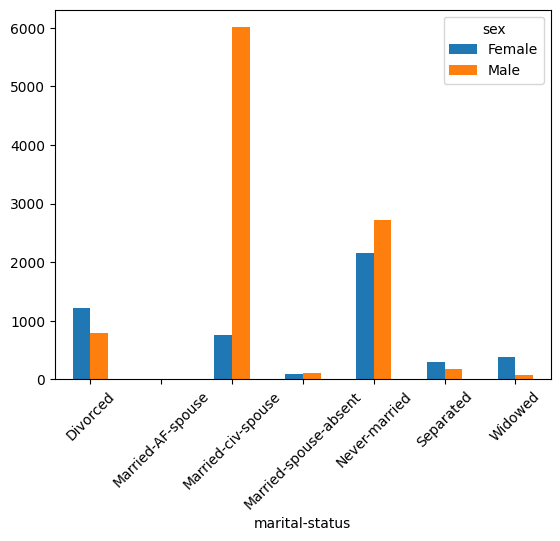

In [ ]:
# Ploting the barplot for contingency table
barplot = p_crosstabTwo.plot.bar(rot=45)

When looking at the barplot married civ spouse has a huge spike in men while it is only the third highest marital status for women. The highest balanced plot is never married while lowest for both is married after spouse.

## **4. Create a new data frame, adultOver40, for those whose age > 40.**

In [ ]:
#creates a DF of all adults who age is greater then 40
adultOver40DF = adultTrainingDF[adultTrainingDF['age'] > 40]

adultOver40DF

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
8,54,?,10,Married-civ-spouse,?,Male,0,0,>50K
...,...,...,...,...,...,...,...,...,...
14787,45,Local-gov,12,Divorced,Prof-specialty,Female,0,0,<=50K
14790,65,Self-emp-not-inc,15,Never-married,Prof-specialty,Male,1086,0,<=50K
14791,43,State-gov,10,Divorced,Adm-clerical,Female,0,0,<=50K
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K


## **5. Recreate the contingency table of sex and marital status for adultOver40**

In [ ]:
#Forms a contingency table between workclass and sex for over 40 years of age
p_crosstabThree = pd.crosstab(adultOver40DF.workclass, adultOver40DF.sex)

print(p_crosstabThree)

sex               Female  Male
workclass                     
?                    119   241
Federal-gov           83   191
Local-gov            198   317
Private             1176  2525
Self-emp-inc          30   306
Self-emp-not-inc     114   579
State-gov             85   178
Without-pay            1     1


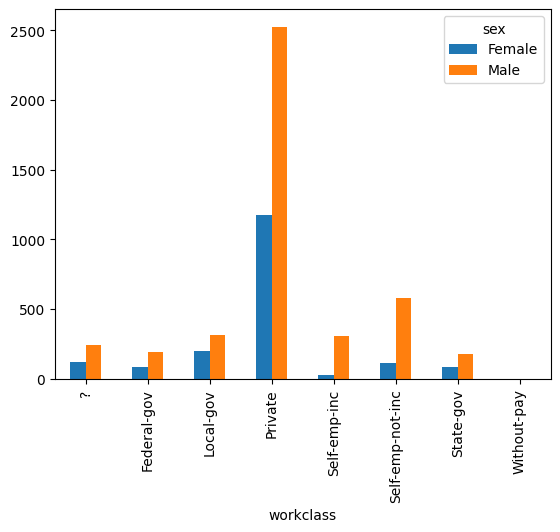

In [ ]:
barplot = p_crosstabThree.plot.bar(rot=90)

When comparing the over age 40 chart we can see it is vert similar even though it is a smaller scale. Another thing that is notable is that never worked is no long represented by anybody.

## **6. Determine whether any outliers exist for the education field**

In [ ]:
#First we scale the column education and then check for amount of outliers using three sigma rule

from scipy import stats
adultTrainingDF['scaled_education'] = stats.zscore(adultTrainingDF.education, nan_policy='omit')

education_outliers = adultTrainingDF.query('(scaled_education > 3 | scaled_education < -3)')['scaled_education']

len(education_outliers)

113

## **7. Standardize (zero mean) the age variable, and identify how many outliers there are. What is the most extreme outlier?**

In [ ]:
#First we scale the column education and then check for amount of outliers using three sigma rule
#Describe is also used to pull the greatest outlier as well as count which is the amount

from scipy import stats
adultTrainingDF['scaled_age'] = stats.zscore(adultTrainingDF.age, nan_policy='omit')

education_outliers = adultTrainingDF.query('(scaled_age > 3 | scaled_age < -3)')['scaled_age']

education_outliers.describe()

count    60.000000
mean      3.411402
std       0.301830
min       3.020275
25%       3.148214
50%       3.349260
75%       3.751354
max       3.751354
Name: scaled_age, dtype: float64

Using describe we can figure out that count shows 60 outliers. The most extreme outlier is 3.751354 as the min is over 3 z-score so we would only be looking at the max. From referencing an earlier describe function we are able to determine that the max is the age of 90.

## **8. Age anomaly? Select only records with age  at least 80, and construct a histogram of age. Explain what you see.**

In [ ]:
#create a dataframe where the age is at least 80

atLeast80DF = adultTrainingDF[(adultTrainingDF['age'] >= 80)]

atLeast80DF

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
99,90,Private,9,Never-married,Other-service,Male,0,2206,<=50K
204,80,?,9,Widowed,?,Male,0,0,<=50K
492,90,Private,9,Never-married,Other-service,Female,0,0,<=50K
552,88,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,Male,0,0,<=50K
885,90,Private,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1066,90,Private,10,Never-married,Other-service,Male,0,0,<=50K
1485,82,?,4,Widowed,?,Male,0,0,<=50K
2420,90,Private,5,Never-married,Adm-clerical,Female,0,0,<=50K
2430,80,Private,14,Widowed,Prof-specialty,Female,0,0,<=50K
2467,90,Local-gov,14,Married-civ-spouse,Exec-managerial,Male,20051,0,>50K


<Axes: >

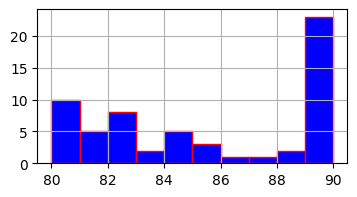

In [ ]:
#Create a histogram with newly created database for age of at least 80
atLeast80DF['age'].hist(bins=10, edgecolor='red', color='blue', figsize=(4, 2))


The most representation from ages over 80 is from 89-90 year olds

## **9. Summarize**



*   When dealing with age in the data set there was not much of a difference between all and ages>40 for sex and marital status
*   When the ages were over 80 the primary representation in the dataframe was age 89-90
*   The most extreme outlier for age was 90 years old
*   Age did not have any outliers that were on the low end
* The education field had 113 outliers
* An easy way to find outliers in python and r is utilizing the z-score
* Married-civ-score held a big population for male
* Never married held the most balanced high representation for both males and females
* Private workclass was the largest represented for both male and women



